# Airline Portfolio Optimization Project

---
Rodrigo Soriano & Philip Bachas-Daunert

**Option 1: Pick your 20 favorite stocks.**

In [3]:
# @title Importing [gurobipy as gp, Model, GRB] | [pandas as pd] | [matplotlib as plt] | [numpy as np] { run: "auto" }

!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp # import module (or package) with the name gurobipy and abbreviate it as gp
from gurobipy import Model, GRB # from gurobipy import Model & GRB solver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Abstract


---


In present-day Miami, Rodrigo and Philip work in an investment company that caters to eccentric upper-class clients. One day, Tom Cruise enters the office unannounced and requests the following from the young, upstart investors:

“My son, Connor Antony, has had trouble finding a direction in life. He is 28 years old and has recently told me that he aspires to be a day trader. As my friend David Miscavige says, ‘one of our important maxims is that a being is as valuable as one is able to help others.’ I want to help my son but I have some constraints, as the budget for ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/) has ballooned quite a bit recently since we keep trying to up the stakes of the action.”

## Constraints


---


### (1) A NASDAQ/NYSE Portfolio of 20 Airline companies with financial data dating back to July 2019.

“I have had a passion for aviation ever since shooting the movie ['Top Gun'](https://www.imdb.com/title/tt0092099/) and it has rubbed off on Connor Antony. I figured since we both are passionate about this field I can help him daily to understand industry trends.”

$A = \{a_1, a_2, \ldots, a_{20}\}$

### (2) Initial Investment is $1,000,000.

“I know it is a meager sum to start a portfolio, but being a producer has me pinching pennies in other areas for the sake of ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/).”

$I = 1,000,000$

### (3) Upper Limit of Risk Tolerance of $\sigma = 50\%$.

“Connor Antony can take a lot of risk in this venture as I may need some extra funds later to fund ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/). As I learned from my time on the set of ['Rain Man'](https://www.imdb.com/title/tt0095953/), sometimes you have to take risks to make a lot of money.”

$ \sigma(R) \leq 0.50$

### (4) Constraint for Upper Bound on Individual Weights

This is a follow-up addition to added by Rodrigo and Philip.

$w_i \leq 0.2 \quad \forall i \in \{1, 2, \ldots, n\}$

# The 'Problem' Data


---

We will be solving this portfolio optimization problem by using the Markowitz framework.

\begin{align*}
\text{Maximize} \quad & E(R) \\
\text{subject to} \quad & \sum_{i=1}^{20} w_i \cdot r_i = E(R) \\
& \sum_{i=1}^{20} w_i = 1 \\
& w_i \cdot I = X_i, \quad i=1,\ldots,20 \\
& \sigma(R) \leq 0.50 \\
& w_i \leq 0.2, \quad i=1,\ldots,20
\end{align*}

Here:
- $E(R)$ is the expected return of the portfolio.
- $r_i$ is the expected return of asset $i$.
- $w_i$ is the proportion of total investment in asset $i$.
- $X_i$ is the amount of money invested in asset $i$.
- $\sigma(R)$ is the risk of the portfolio.
- $I = 1,000,000$

The added complication of Tom Cruise's request is how volatile the airline industry has been since the COVID-19 Pandemic started in late 2019. Rodrigo and Philip are not quite sure if this part of the challenge for Connor Antony or if Tom Cruise just really loves airplanes and the airline industry. Read this International Air Transport Association funded article from December 2022 for a holistic understanding of this industry's volatility: [Understanding the pandemic’s impact on the aviation value chain](https://www.iata.org/en/iata-repository/publications/economic-reports/understanding-the-pandemics-impact-on-the-aviation-value-chain/).

## Class Notes on Portfolio Selection Optimization for Reference
This model is an example of the classic [Markowitz portfolio selection optimization model](https://en.wikipedia.org/wiki/Markowitz_model). We want to find the fraction of the portfolio to invest among a set of stocks that balances risk and return. It is a Quadratic Programming (QP) model with vector and matrix data for returns and risk, respectively. This is best suited to a matrix formulation, so we use the Gurobi Python *matrix* interface. The basic model is fairly simple, so we also solve it parametrically to find the efficient frontier.

### Model Formulation
#### Parameters

We use the [Greek values](https://en.wikipedia.org/wiki/Greeks_\(finance\)) that are traditional in finance:

- $\delta$: n-element vector measuring the change in price for each stock
- $\sigma$: n x n matrix measuring the covariance among stocks

There is one additional parameter when solving the model parametrically:

- r: target return


#### Decision Variables
- $x \ge 0$: n-element vector where each element represents the fraction of the porfolio to invest in each stock

#### Objective Function
Minimize the total risk, a convex quadratic function:

\begin{equation}
\min x^t \cdot \sigma \cdot x
\end{equation}

#### Constraints

Allocate the entire portfolio: the total investments should be 1.0 (100%), where $e$ is a unit vector (all 1's):

\begin{equation}
e \cdot x = 1
\end{equation}


Return: When we solve the model parametrically for different return values $r$, we add a constraint on the target return:

\begin{equation}
\delta \cdot x = r
\end{equation}

# Part (A)

## Collect data about the stocks' returns (based on closing price/month) for, at the minimum, the last 3 months. You can find such data on the internet, for example at [Yahoo! Finance](https://finance.yahoo.com/lookup).



---
Here is a list of the 20 airline stocks we are going to analyze. The period is from July, 2019 to June, 2023. Please note that based upon the Investor Relations Annual Review Documents some airlines have FYs that do not end in December.:

* AAL
* DAL
* UAL
* LUV
* RYAAY
* JBLU
* SAVE
* VLRS
* ULCC
* GOL
* AZUL
* CPA
* HA
* MESA
* ALK
* SNCY
* ALGT
* ATSG
* UP
* SKYW





In [4]:
'''
Note for the professor, yfinance only valid periods are:
“1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”

We want a specific number of months (48 months) which yfinance has a limitation.
We will download the data into a csv file and then use pandas.

'''
# Loading in the Dataset here.
data = pd.read_csv('Top 20 Airline Stocks - Historical Data Jul 2019 to Jun 2023.csv') # Please load attached csv file

# Part (B)
## Compute the average return and the covariance matrix.

In [5]:
# Ensure the data is sorted by Stock and Date.
data = data.sort_values(['Stock', 'Date'])

# Compute the log returns.
data['LogReturn'] = np.log(data['Close']) - np.log(data['Close'].shift(1))

# Handle the first return for each stock (should be NaN because there is no previous period).
data['LogReturn'] = data['LogReturn'].where(data['Stock'] == data['Stock'].shift(1), np.nan)

# Compute average return.
average_returns = data.groupby('Stock')['LogReturn'].mean()

# Pivot the data so that we have one column per stock, and rows represent consecutive time periods.
pivoted_data = data.pivot(index='Date', columns='Stock', values='LogReturn')

# Compute covariance matrix.
covariance_matrix = pivoted_data.cov()

# If you wish to visualize the results
print("Average Returns:")
print(average_returns)

print("\nCovariance Matrix:")
print(covariance_matrix)

Average Returns:
Stock
AAL     -0.017057
ALGT    -0.017745
ALK     -0.010652
ATSG     0.002951
AZUL    -0.034658
CPA     -0.008079
DAL     -0.014603
GOL     -0.033693
HA      -0.015989
JBLU    -0.023310
LUV     -0.012301
MESA    -0.034978
RYAAY   -0.008378
SAVE    -0.016603
SKYW    -0.025994
SNCY    -0.025744
UAL     -0.017716
ULCC    -0.011498
UP      -0.073816
VLRS    -0.013185
Name: LogReturn, dtype: float64

Covariance Matrix:
Stock       AAL      ALGT       ALK      ATSG      AZUL       CPA       DAL  \
Stock                                                                         
AAL    0.253971  0.198104  0.177499 -0.036342  0.388126  0.159522  0.188012   
ALGT   0.198104  0.293407  0.160995  0.009204  0.372472  0.093129  0.144065   
ALK    0.177499  0.160995  0.144340 -0.007800  0.256305  0.131343  0.137575   
ATSG  -0.036342  0.009204 -0.007800  0.066476 -0.068197 -0.030336 -0.027330   
AZUL   0.388126  0.372472  0.256305 -0.068197  0.842009  0.174258  0.289157   
CPA    0.159

# Part (C)
## Plot the efficient frontier of your optimal portfolio of minimum variance.

In [6]:
# Number of stocks
n = len(average_returns)

# Optimization model
m = gp.Model("PortfolioOptimization")

# Variables
w = m.addVars(n, name="w", lb=0, ub=0.2)  # weights

# Constraints
m.addConstr(gp.quicksum(w[i] for i in range(n)) == 1, "budget")  # weights sum to 1

# Risk Tolerance Constraint
m.addQConstr(
    gp.quicksum(w[i] * w[j] * covariance_matrix.iloc[i, j] for i in range(n) for j in range(n)) <= 0.50**2,
    name="risk_tolerance"
)

# Objective - Maximize return under the risk constraint
m.setObjective(
    gp.quicksum(w[i] * average_returns[i] for i in range(n)),
    GRB.MAXIMIZE
)

# Adjust NonConvex parameter
m.Params.NonConvex = 2

# Solve
m.optimize()

# Check if optimization is successful
if m.status == GRB.Status.OPTIMAL:
    print('Optimal weights found:')
    optimal_weights = [v.x for v in m.getVars()]
    print(optimal_weights)
    print('Expected Return:', m.objVal)
else:
    print('No solution found')

returns = np.linspace(min(average_returns), max(average_returns), num=100)
risks = []

for target_return in returns:
    m_iter = gp.Model("PortfolioOptimization")
    w = m_iter.addVars(n, name="w", lb=0)

    m_iter.addConstr(gp.quicksum(w[i] for i in range(n)) == 1, "budget")

    # Return Target Constraint
    m_iter.addConstr(
        gp.quicksum(w[i] * average_returns[i] for i in range(n)) >= target_return,
        name="return_target"
    )

    # Objective - Minimize risk for a given level of return
    m_iter.setObjective(
        gp.quicksum(w[i] * w[j] * covariance_matrix.iloc[i, j] for i in range(n) for j in range(n)),
        GRB.MINIMIZE
    )

    m_iter.Params.NonConvex = 2
    m_iter.optimize()

    if m_iter.status == GRB.Status.OPTIMAL:
        risk = np.sqrt(m_iter.objVal)  # Directly obtain the minimized risk from the objective
        risks.append(risk)
    else:
        risks.append(None)

Streaming output truncated to the last 5000 lines.
     0     0   -0.01470    0   43    0.03094   -0.01470   148%     -    0s
     0     0   -0.00957    0   53    0.03094   -0.00957   131%     -    0s
     0     0   -0.00957    0   64    0.03094   -0.00957   131%     -    0s
     0     0   -0.00697    0   76    0.03094   -0.00697   123%     -    0s
     0     0   -0.00697    0   76    0.03094   -0.00697   123%     -    0s
     0     0   -0.00466    0   65    0.03094   -0.00466   115%     -    0s
     0     0   -0.00450    0   76    0.03094   -0.00450   115%     -    0s
     0     0   -0.00376    0   87    0.03094   -0.00376   112%     -    0s
     0     0   -0.00346    0   87    0.03094   -0.00346   111%     -    0s
     0     0    0.00468    0  102    0.03094    0.00468  84.9%     -    0s
     0     0    0.00477    0  102    0.03094    0.00477  84.6%     -    0s
     0     0    0.00592    0  101    0.03094    0.00592  80.8%     -    0s
     0     0    0.00763    0  131    0.03094    0

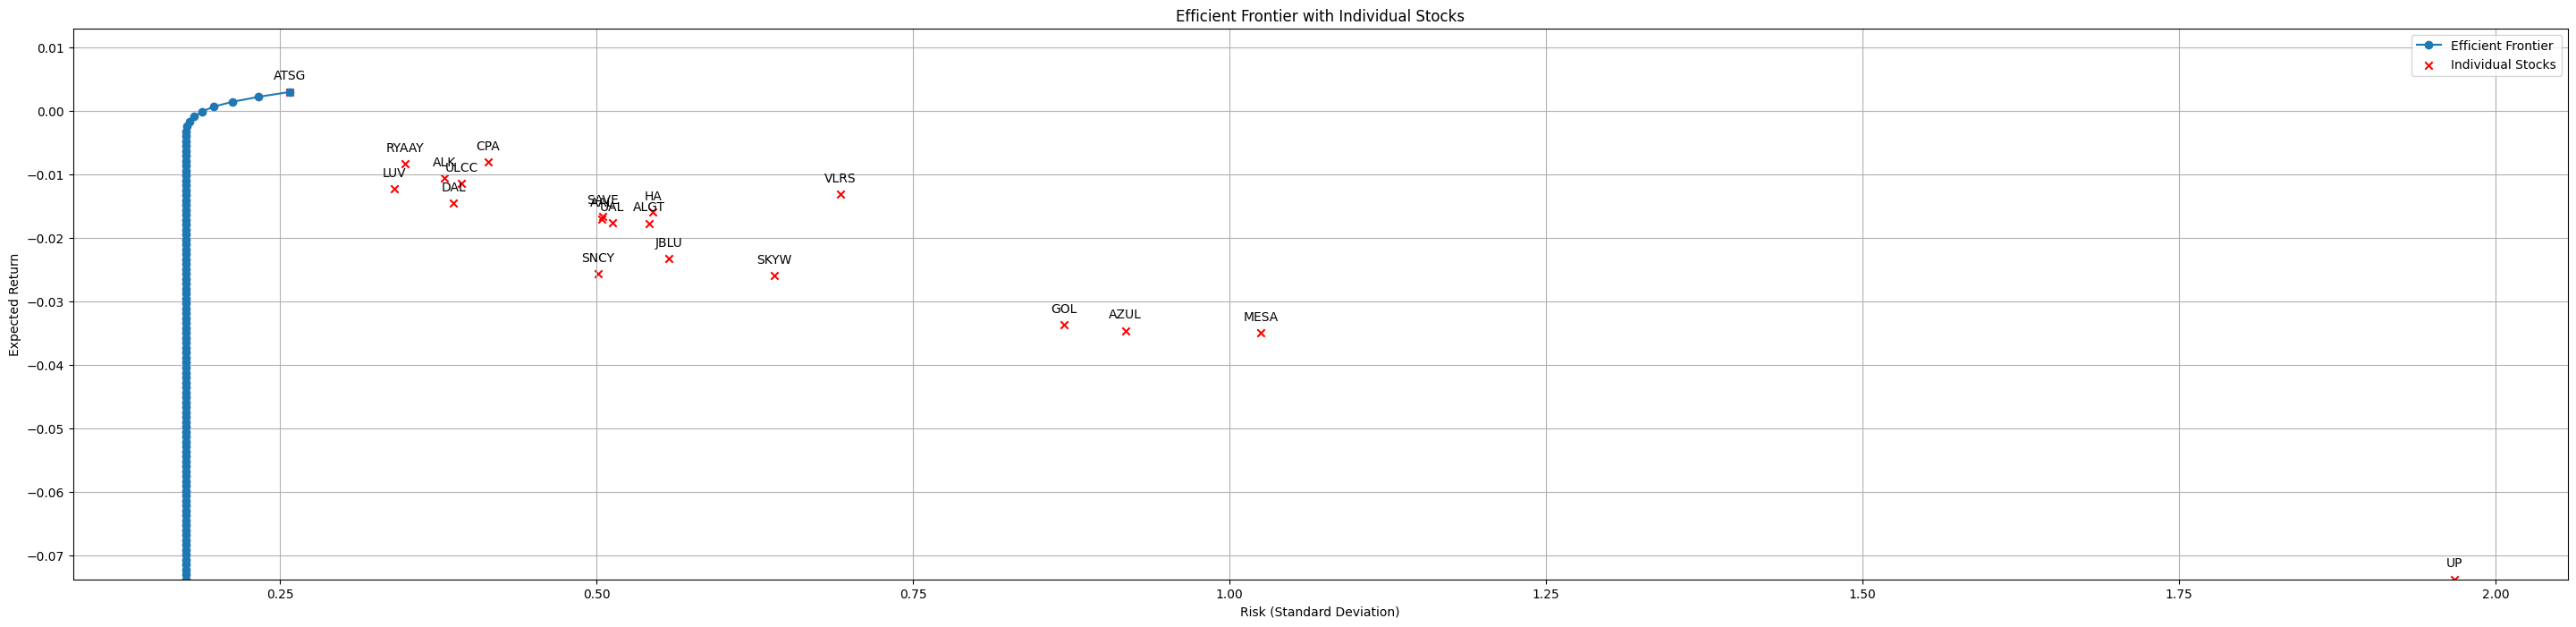

In [7]:
# Set figure size
plt.figure(figsize=(36, 8))

# Plot the Efficient Frontier
# 'risks' is a list of risk (std dev) values, 'returns' is a list of expected return values
plt.plot(risks, returns, linestyle='-', marker='o', label='Efficient Frontier')

# Labels and grid
plt.title('Efficient Frontier with Individual Stocks')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)

# Extract stock tickers
stock_tickers = average_returns.index.tolist()

# Lists to store individual stock risks and returns
individual_risks = []
individual_returns = []

# Iterate through stocks and calculate risk and return for each
for i, ticker in enumerate(stock_tickers):
    # Individual return is simply the average return of the stock
    individual_return = average_returns[i]

    # Individual risk is the square root of the variance of the stock
    individual_risk = np.sqrt(covariance_matrix.iloc[i, i])

    # Append values to lists
    individual_returns.append(individual_return)
    individual_risks.append(individual_risk)

    # Plot individual stocks
    plt.scatter(individual_risk, individual_return, marker='x', color='red')
    plt.annotate(ticker, (individual_risk, individual_return), textcoords="offset points", xytext=(0,10), ha='center')

# Add legend to the plot
plt.legend(['Efficient Frontier', 'Individual Stocks'], loc='upper right')

# Adjust y-axis to have a higher upper limit
# You might set your own ymin and ymax depending on the returns of your stocks and portfolios
plt.ylim([min(individual_returns), max(individual_returns) + 0.01])

# If you notice that your efficient frontier does not extend all the way to the smallest risk (standard deviation),
# you might consider adjusting the constraints in your optimization model or even extending the x-axis to visualize it better.

# Show the plot
plt.show()

#Part (D)
## Set your target return to be equal to the average return across all stocks. What is your optimal portfolio?

In [8]:
# Calculate the average return across all stocks
target_return = average_returns.mean()
print(f"\nTarget Return (mean of all stocks): {target_return}")

# Optimization model for target return
m_target = gp.Model("TargetReturnPortfolioOptimization")

# Variables
w_target = m_target.addVars(n, name="w", lb=0, ub=0.2)  # weights

# Constraints
m_target.addConstr(gp.quicksum(w_target[i] for i in range(n)) == 1, "budget")  # weights sum to 1

# Target Return Constraint
m_target.addConstr(
    gp.quicksum(w_target[i] * average_returns[i] for i in range(n)) >= target_return,
    name="target_return"
)

# Objective - Minimize risk for a given level of return
m_target.setObjective(
    gp.quicksum(w_target[i] * w_target[j] * covariance_matrix.iloc[i, j] for i in range(n) for j in range(n)),
    GRB.MINIMIZE
)

# Adjust NonConvex parameter
m_target.Params.NonConvex = 2

# Solve
m_target.optimize()

# Check if optimization is successful
if m_target.status == GRB.Status.OPTIMAL:
    print('\nOptimal weights found for target return:')
    optimal_weights_target = [v.x for v in m_target.getVars()]
    for ticker, weight in zip(average_returns.index, optimal_weights_target):
        print(f"{ticker}: {weight:.4f}")
    print('Expected Return:', target_return)
    print('Risk (std. dev.):', np.sqrt(m_target.objVal))
else:
    print('No solution found')


Target Return (mean of all stocks): -0.020652470981143173
Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x9245907c
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-03, 8e+00]
  Bounds range     [2e-01, 2e-01]
  RHS range        [2e-02, 1e+00]

Continuous model is non-convex -- solving as a MIP

Found heuristic solution: objective 0.1800375
Presolve time: 0.00s
Presolved: 383 rows, 231 columns, 1010 nonzeros
Presolved model has 20 quadratic constraint(s)
Presolved model has 190 bilinear constraint(s)
Variable types: 231 continuous, 0 integer (0 binary)

Root relaxation: objective -1.518721e-02, 33 iterations, 

# Conclusion


---

Six months later, Tom Cruise storms into Rodrigo and Philip’s office, a fierce glare on his face.

"I know ['The Color of Money'](https://www.imdb.com/title/tt0090863/) is green, but I see red all over Connor Antony’s airline portfolio! What is going on?!” scowled Tom Cruise.

Rodrigo and Philip quickly presented Tom Cruise with a detailed Jupyter Notebook explanation of their portfolio optimization via the Markowitz framework. The pair demonstrated that their efficient frontier figure had skewed data, resulting in a poor efficient frontier indication—not ideal for a profitable and diverse portfolio. Even the inclusion of a constraint for the upper bound on the 20 stocks’ Individual Weights did little to enhance the diversity and profitability of the portfolio. Only 5 of the airline stocks had a weight greater than zero, with a sixth having a negligible weight.


* [ATSG](https://finance.yahoo.com/quote/ATSG) | Weight: 0.2000 | Initial Investment: \$200,000
* [LUV](https://finance.yahoo.com/quote/LUV) | Weight: 0.2000 | Initial Investment: \$200,000
* [RYAAY](https://finance.yahoo.com/quote/RYAAY) | Weight: 0.2000 | Initial Investment: \$200,000
* [CPA](https://finance.yahoo.com/quote/CPA) | Weight: 0.1986 | Initial Investment: \$198,600
* [DAL](https://finance.yahoo.com/quote/DAL) | Weight: 0.1882 | Initial Investment: \$188,200
* [ULCC](https://finance.yahoo.com/quote/ULCC) | Weight: 0.0132 | Initial Investment: \$13,200

Rodrigo and Philip confidently asserted to Tom Cruise that this was a pivotal lesson for Connor Antony: portfolios need to have diversification across multiple industries and company sizes. Tom Cruise nodded, remarking, “Well, at least this wasn’t a costly lesson, as I have recently secured extra funding for ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/) from the studio!” As Tom Cruise exited the office, reassured of this financial lesson for Connor Antony, he overheard Rodrigo and Philip muse, “Day trading is a ['Risky Business'](https://www.imdb.com/title/tt0086200/) without diversification in your portfolio.”